# Vincent Purcell
##### HW2 - Sensitivity Analysis #####
Some code was taken and modified from Professor Brietzman's code

Import Libraries and download data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
X = df_cancer.drop(['target'], axis = 1)
y = df_cancer['target']

Split Data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

### Support Vector Classifier + Confusion Matrix

<AxesSubplot:>

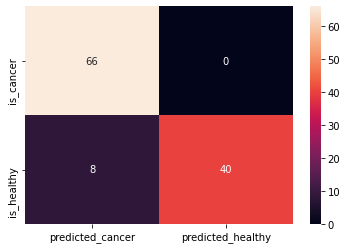

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_predict = svc_model.predict(X_test)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
sns.heatmap(confusion, annot=True)

### MLP Classifier + Confusion Matrix

<AxesSubplot:>

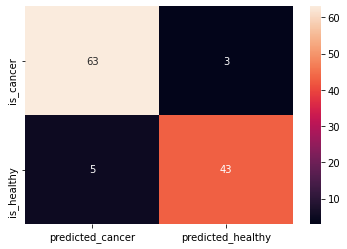

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
mlp = MLPClassifier(hidden_layer_sizes=(6,6,6,2), max_iter=2000)
mlp.fit(X_train,y_train)
y_predict = mlp.predict(X_test)

cm = np.array(confusion_matrix(y_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
sns.heatmap(confusion, annot=True)

### Support Vector Regression + Sensitivity Analysis

In [12]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_poly.fit(X_train, y_train)
y_predict = svr_poly.predict(X_test)

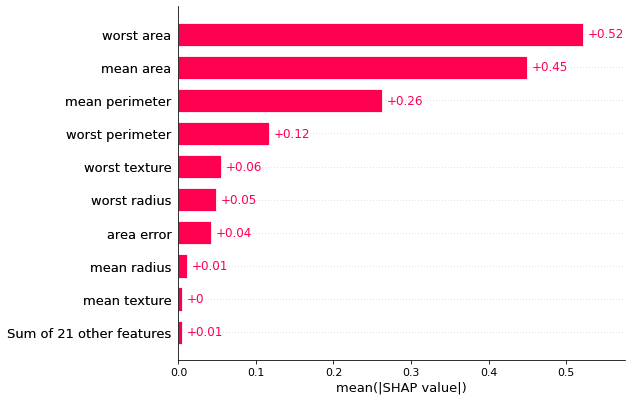

In [14]:
import shap
explainer = shap.explainers.Permutation(svr_poly.predict, X_test)
shap_values_svc = explainer(X_test[:100], silent=True)
shap.plots.bar(shap_values_svc)

## MLP Regression + Sensitivity Analysis

In [17]:
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(random_state=1, max_iter=2000).fit(X_train, y_train)
y_predict = mlp_regr.predict(X_test)

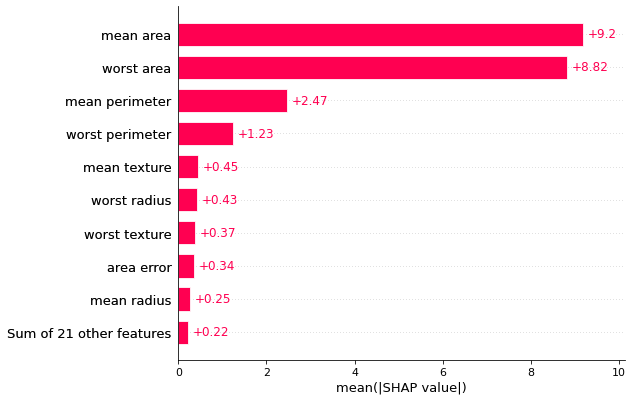

In [16]:
explainer = shap.explainers.Permutation(mlp_regr.predict, X_test)
shap_values_svc = explainer(X_test[:100], silent=True)
shap.plots.bar(shap_values_svc)